<a href="https://colab.research.google.com/github/MuzniZakiRiyadi/Cadangan/blob/main/TEXT_ANALYSIS_MUZNI_ZAKI_RIYADI_2008108010027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project UAS Text Analysis
- Nama : Muzni Zaki Riyadi
- NIM  : 2008108010027

## Data
Data yang akan digunakan adalah komentar atau review dari pengguna aplikasi ebay melalui Google Play Store

In [1]:
!pip install google_play_scraper

In [2]:
from google_play_scraper import Sort, reviews_all
import pandas as pd

In [3]:
result = reviews_all(
        'com.ebay.mobile',
        sleep_milliseconds=0,
        lang='id',
        country='id',
        sort=Sort.NEWEST
    )

ebay = pd.DataFrame.from_records(result)
ebay = ebay[['at','userName' ,'content', 'score' ]]

In [4]:
ebay

,at,userName,content,score
0,2023-12-19 20:05:06,Minda Reis,Baik,5
1,2023-12-19 01:02:01,Cesario Tarigan,Very helpful,5
2,2023-12-17 18:21:25,misterking otoproject,Best,5
3,2023-12-11 14:58:08,Hendra Tanudinata,Always come here if need special stuff.,5
4,2023-12-11 00:12:05,Takdir,Komporgas,4
...,...,...,...,...
2874,2012-07-31 01:40:25,Pengguna Google,Ini buuuuiagus gan.,5
2875,2012-07-09 09:42:55,Pengguna Google,wow exellent,5
2876,2012-04-16 03:04:39,Pengguna Google,Mantap,5
2877,2012-04-07 12:07:21,Pengguna Google,"Nice,",5


In [5]:
ebay['at'] = pd.to_datetime(ebay['at'])

# Filter data diambil dari tanggal 01-01-2023
data_review_ebay= ebay

In [6]:
data_review_ebay

,at,userName,content,score
0,2023-12-19 20:05:06,Minda Reis,Baik,5
1,2023-12-19 01:02:01,Cesario Tarigan,Very helpful,5
2,2023-12-17 18:21:25,misterking otoproject,Best,5
3,2023-12-11 14:58:08,Hendra Tanudinata,Always come here if need special stuff.,5
4,2023-12-11 00:12:05,Takdir,Komporgas,4
...,...,...,...,...
2874,2012-07-31 01:40:25,Pengguna Google,Ini buuuuiagus gan.,5
2875,2012-07-09 09:42:55,Pengguna Google,wow exellent,5
2876,2012-04-16 03:04:39,Pengguna Google,Mantap,5
2877,2012-04-07 12:07:21,Pengguna Google,"Nice,",5


##Cleaning Data

In [7]:
!pip install nltk
!pip install sastrawi


In [8]:
import numpy as np
import pandas as pd
from gensim.utils import simple_preprocess

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


import re
import nltk

nltk.download('punkt')

from tqdm import tqdm
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize

stopword = StopWordRemoverFactory().create_stop_word_remover()
stemmer = StemmerFactory().create_stemmer()

def stemmerSastrawi(text):
    return stemmer.stem(text)

def stopwordSastrawi(text):
    return stopword.remove(text)

def regex(text):
    text = text.lower()
    text = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',text) #remove symbol
    text = re.sub('[\s]+', ' ', text) #menghilangkan additional whitespace
    text = re.sub(r'[^\w\s]','',text) #remove punctuation
    text = text.strip() #menghilangkan enter, tab, dll
    return text

def ka_handling(text):
    tokens = text.split()
    for i,token in enumerate(tokens):
        if token in ka.keys():
            tokens[i] = ka[token]
    return ''.join(' '.join(x for x in tokens))

def addt_stop_word(sentence):
    words = word_tokenize(sentence)
    return ''.join(' '.join(w for w in words if not w.lower() in stop_words))

ka = pd.read_csv('kamus_alay.csv', encoding = "ISO-8859-1", header=None)
ka.columns = ['matab','mantap']
ka = {ka.matab[i]:ka.mantap[i] for i in range(0,len(ka.matab.values))}

stop_words = {'dan', 'di', 'ini',  'USER', 'User'}


def all_preproc(input_data):
    preproc = list(map(regex, input_data.values))
    preproc = list(map(ka_handling, preproc))
    preproc = list(map(stemmerSastrawi, tqdm(preproc)))
    preproc = list(map(stopwordSastrawi, tqdm(preproc)))
    preproc = list(map(addt_stop_word, tqdm(preproc)))
    return preproc

data_review_ebay['contentp'] = data_review_ebay['content'].astype(str).apply(lambda x: ' '.join(simple_preprocess(x)))
data_review_ebay['contentp_clean'] = all_preproc(data_review_ebay['contentp'])
data_review_ebay



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 2879/2879 [00:00<00:00, 13042.39it/s]


,at,userName,content,score,contentp,contentp_clean
0,2023-12-19 20:05:06,Minda Reis,Baik,5,baik,baik
1,2023-12-19 01:02:01,Cesario Tarigan,Very helpful,5,very helpful,very helpful
2,2023-12-17 18:21:25,misterking otoproject,Best,5,best,best
3,2023-12-11 14:58:08,Hendra Tanudinata,Always come here if need special stuff.,5,always come here if need special stuff,always come here if need special stuff
4,2023-12-11 00:12:05,Takdir,Komporgas,4,komporgas,komporgas
...,...,...,...,...,...,...
2874,2012-07-31 01:40:25,Pengguna Google,Ini buuuuiagus gan.,5,ini buuuuiagus gan,buuuuiagus gan
2875,2012-07-09 09:42:55,Pengguna Google,wow exellent,5,wow exellent,wow exellent
2876,2012-04-16 03:04:39,Pengguna Google,Mantap,5,mantap,mantap
2877,2012-04-07 12:07:21,Pengguna Google,"Nice,",5,nice,nice


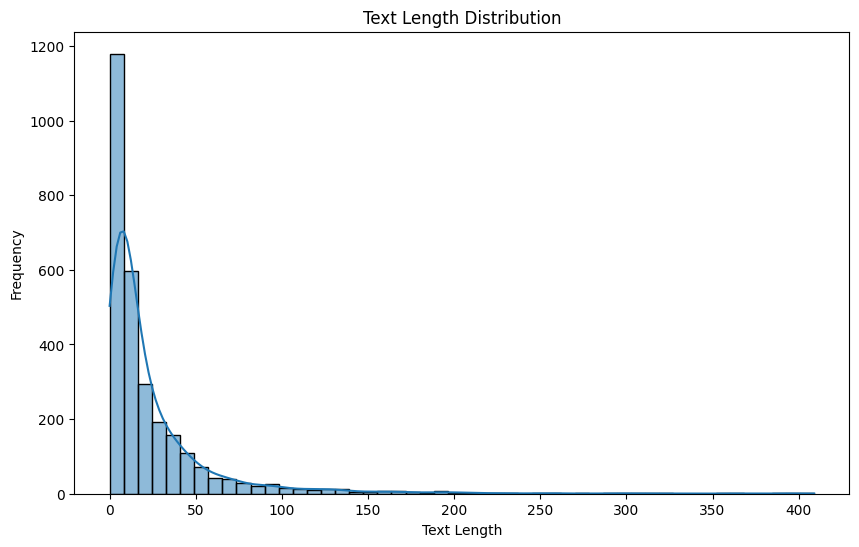

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

data_review_ebay['text_length'] = data_review_ebay['contentp_clean'].apply(len)

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(data=data_review_ebay, x='text_length', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

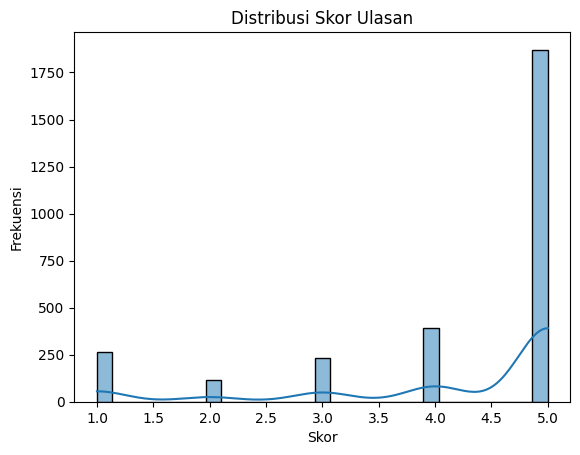

In [10]:
# Plot histogram untuk kolom 'score'
sns.histplot(data_review_ebay['score'], kde=True)
plt.title('Distribusi Skor Ulasan')
plt.xlabel('Skor')
plt.ylabel('Frekuensi')
plt.show()

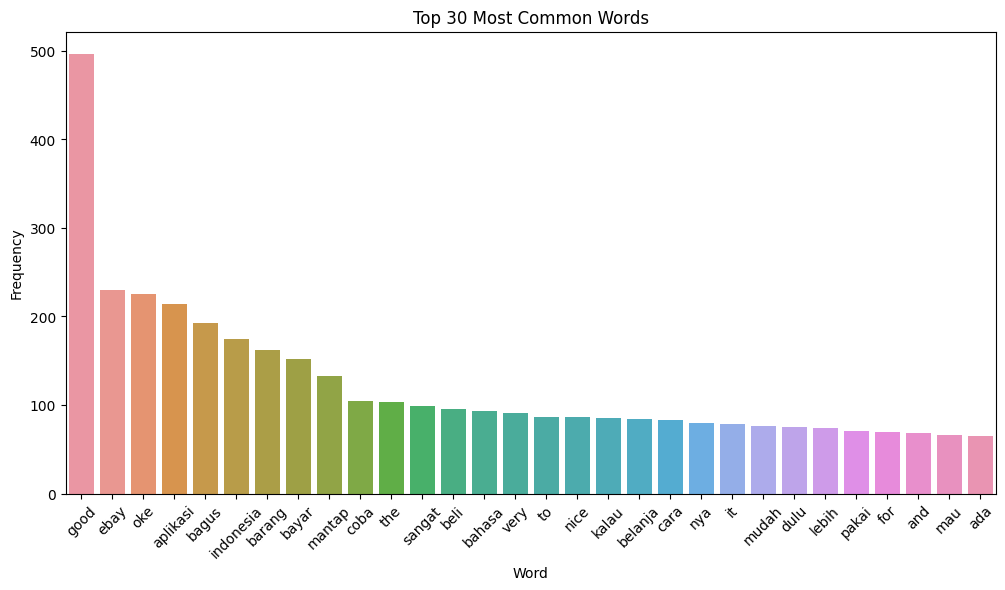

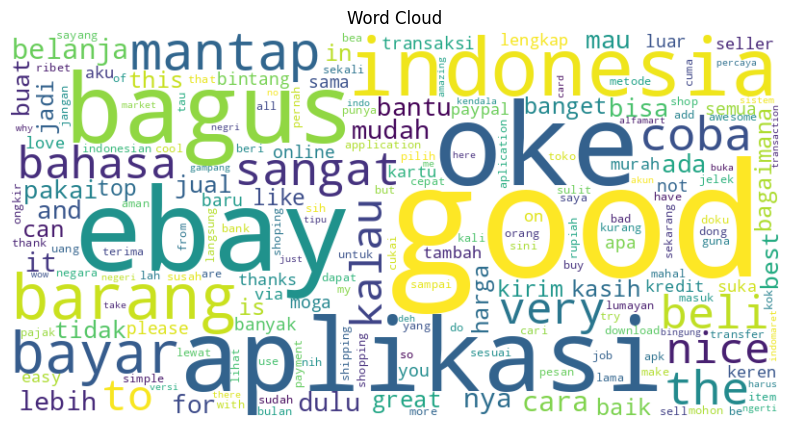

In [11]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize and count word occurrences
word_counts = Counter(word_tokenize(' '.join(data_review_ebay['contentp_clean'])))
most_common_words = word_counts.most_common(30)  # Get the top 30 most common words

# Plot a bar chart for the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title('Top 30 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [12]:
# Save file CSV yang sudah di filter
data_review_ebay.to_csv('ebay_clean.csv', index=False)

In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv('ebay_clean.csv')
df

,at,userName,content,score,contentp,contentp_clean,text_length
0,2023-12-19 20:05:06,Minda Reis,Baik,5,baik,baik,4
1,2023-12-19 01:02:01,Cesario Tarigan,Very helpful,5,very helpful,very helpful,12
2,2023-12-17 18:21:25,misterking otoproject,Best,5,best,best,4
3,2023-12-11 14:58:08,Hendra Tanudinata,Always come here if need special stuff.,5,always come here if need special stuff,always come here if need special stuff,38
4,2023-12-11 00:12:05,Takdir,Komporgas,4,komporgas,komporgas,9
...,...,...,...,...,...,...,...
2874,2012-07-31 01:40:25,Pengguna Google,Ini buuuuiagus gan.,5,ini buuuuiagus gan,buuuuiagus gan,14
2875,2012-07-09 09:42:55,Pengguna Google,wow exellent,5,wow exellent,wow exellent,12
2876,2012-04-16 03:04:39,Pengguna Google,Mantap,5,mantap,mantap,6
2877,2012-04-07 12:07:21,Pengguna Google,"Nice,",5,nice,nice,4


In [14]:
df.describe()

,score,text_length
count,2879.000000,2879.000000
mean,4.210142,24.224383
std,1.296259,37.200073
min,1.000000,0.000000
25%,4.000000,4.000000
50%,5.000000,11.000000
75%,5.000000,28.000000
max,5.000000,409.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   at              2879 non-null   object
 1   userName        2879 non-null   object
 2   content         2875 non-null   object
 3   score           2879 non-null   int64 
 4   contentp        2837 non-null   object
 5   contentp_clean  2834 non-null   object
 6   text_length     2879 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 157.6+ KB


In [16]:
df.isna().any()

at                False
userName          False
content            True
score             False
contentp           True
contentp_clean     True
text_length       False
dtype: bool

In [17]:
df['sentiment_first_scheme'] = df['score'].apply(lambda x: 'negative' if x in [1, 2] else 'positive')

# Sentiment analysis based on the second scheme
df['sentiment_second_scheme'] = df['score'].apply(lambda x: 'negative' if x in [1, 2] else ('neutral' if x == 3 else 'positive'))


In [18]:
df.sentiment_second_scheme.value_counts()

positive    2261
negative     383
neutral      235
Name: sentiment_second_scheme, dtype: int64

In [19]:
df.sentiment_first_scheme.value_counts()

positive    2496
negative     383
Name: sentiment_first_scheme, dtype: int64

In [20]:
df

,at,userName,content,score,contentp,contentp_clean,text_length,sentiment_first_scheme,sentiment_second_scheme
0,2023-12-19 20:05:06,Minda Reis,Baik,5,baik,baik,4,positive,positive
1,2023-12-19 01:02:01,Cesario Tarigan,Very helpful,5,very helpful,very helpful,12,positive,positive
2,2023-12-17 18:21:25,misterking otoproject,Best,5,best,best,4,positive,positive
3,2023-12-11 14:58:08,Hendra Tanudinata,Always come here if need special stuff.,5,always come here if need special stuff,always come here if need special stuff,38,positive,positive
4,2023-12-11 00:12:05,Takdir,Komporgas,4,komporgas,komporgas,9,positive,positive
...,...,...,...,...,...,...,...,...,...
2874,2012-07-31 01:40:25,Pengguna Google,Ini buuuuiagus gan.,5,ini buuuuiagus gan,buuuuiagus gan,14,positive,positive
2875,2012-07-09 09:42:55,Pengguna Google,wow exellent,5,wow exellent,wow exellent,12,positive,positive
2876,2012-04-16 03:04:39,Pengguna Google,Mantap,5,mantap,mantap,6,positive,positive
2877,2012-04-07 12:07:21,Pengguna Google,"Nice,",5,nice,nice,4,positive,positive


Text(0, 0.5, 'Label Score')

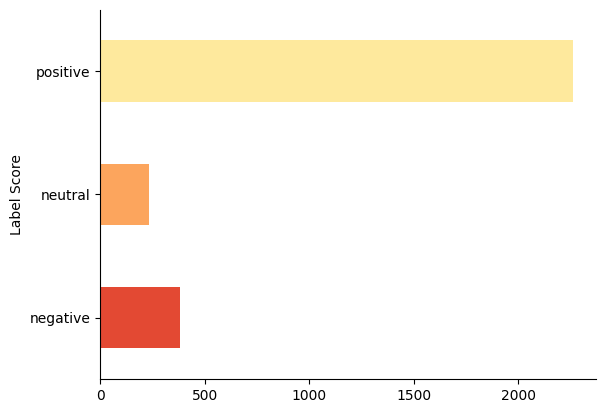

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment_second_scheme').size().plot(kind='barh', color=sns.palettes.mpl_palette('RdYlBu'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().set_ylabel('Label Score')

Text(0, 0.5, 'Label Score')

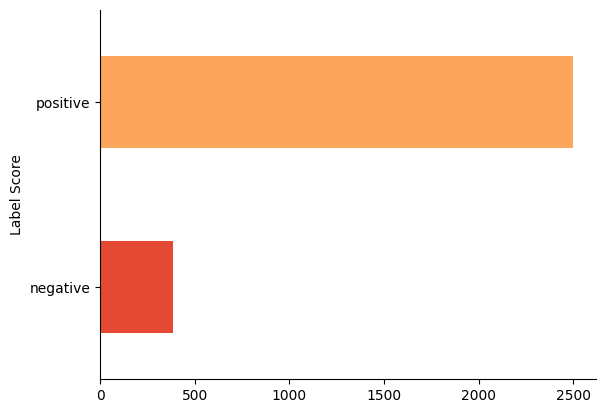

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment_first_scheme').size().plot(kind='barh', color=sns.palettes.mpl_palette('RdYlBu'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().set_ylabel('Label Score')

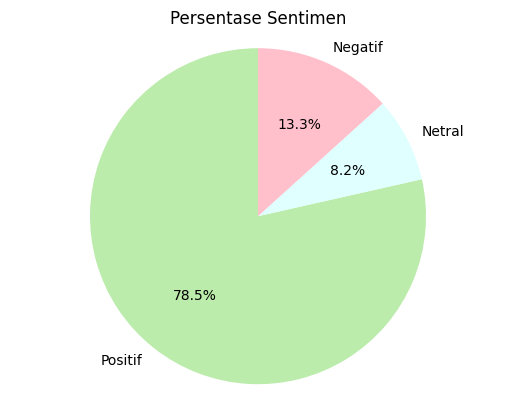

In [23]:
import matplotlib.pyplot as plt

# Menghitung jumlah sentimen positif, netral dan negatif
positif_count = df[df['sentiment_second_scheme'] == 'positive'].shape[0]
netral_count = df[df['sentiment_second_scheme'] == 'neutral'].shape[0]
negatif_count = df[df['sentiment_second_scheme'] == 'negative'].shape[0]

# Data untuk diagram lingkaran
labels = ['Positif', 'Netral', 'Negatif']
sizes = [positif_count, netral_count, negatif_count]

# Warna
colors = ['#BCECAC', 'lightcyan','#FFC0CB']

# Pengaturan plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Pengaturan tambahan
ax.axis('equal')  # Agar diagram lingkaran terlihat bulat

# Judul diagram
plt.title('Persentase Sentimen')

# Tampilkan diagram lingkaran
plt.show()

In [24]:
# Memfilter baris dengan label 'Positive'
data_positif = data_review_ebay[df['sentiment_second_scheme'] == 'positive']

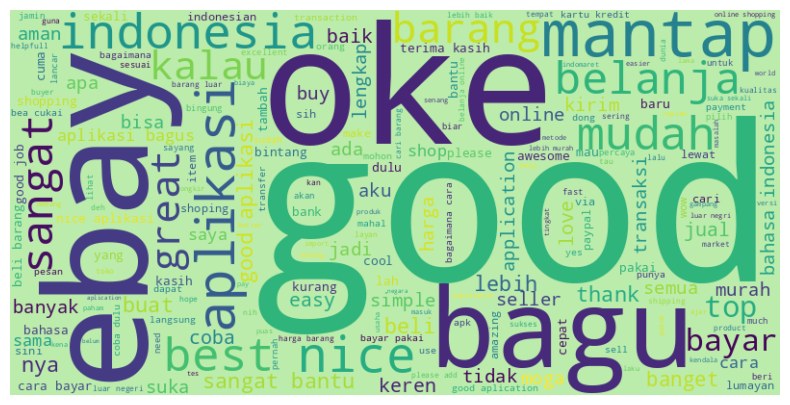

In [25]:
text_corpus = ' '.join(data_positif['contentp_clean'].values)
wordcloud = WordCloud(width=800, height=400, background_color='#BCECAC').generate(text_corpus)


# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
# Memfilter baris dengan label 'Neutral'
data_netral = data_review_ebay[df['sentiment_second_scheme'] == 'neutral']

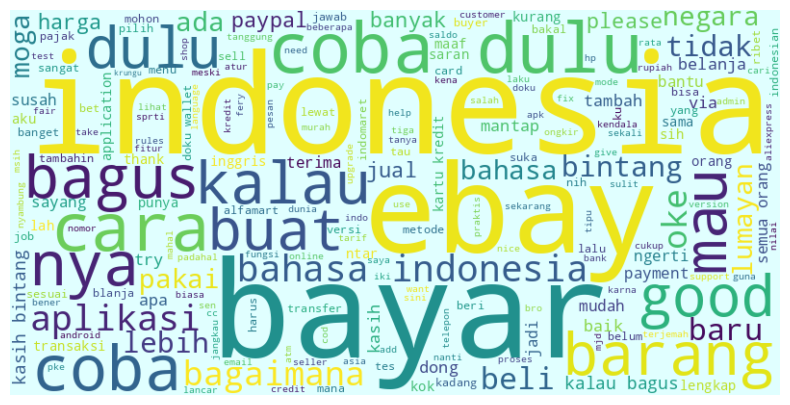

In [27]:
text_corpus = ' '.join(data_netral['contentp_clean'].values)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='lightcyan').generate(text_corpus)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
# Memfilter baris dengan label 'Negative'
data_negatif = data_review_ebay[df['sentiment_second_scheme'] == 'negative']

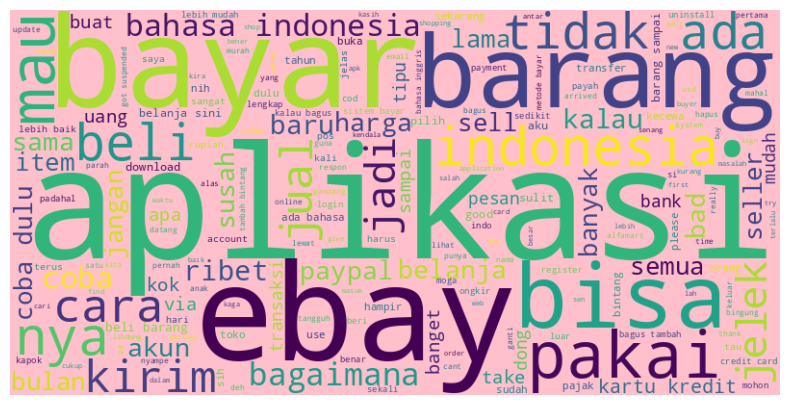

In [29]:
text_corpus = ' '.join(data_negatif['contentp_clean'].values)
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='#FFC0CB').generate(text_corpus)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##Proses Klasifikasi


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [31]:
df = df[['contentp_clean', 'sentiment_first_scheme', 'score']]
missing_values = df['contentp_clean'].isna().sum()
if missing_values > 0:
    df['contentp_clean'].fillna('', inplace=True)

<ipython-input-31-3de0c25f5858>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contentp_clean'].fillna('', inplace=True)


In [32]:
X = df['contentp_clean']  # Text data
y_binary = (df['sentiment_first_scheme'] == 'positive').astype(int)  # Binary labels (1 for positive, 0 for negative)
y_multi = df['score']  # Multi-class labels (original star ratings)

X_train, X_test, y_binary_train, y_binary_test, y_multi_train, y_multi_test = train_test_split(
    X, y_binary, y_multi, test_size=0.2, random_state=42)

In [33]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [34]:
X_train_tfidf

<2303x2180 sparse matrix of type '<class 'numpy.float64'>'
	with 9251 stored elements in Compressed Sparse Row format>

In [35]:

X_train_tfidf_dense = X_train_tfidf.toarray()

# Print the TF-IDF representation
print("TF-IDF representation of X_train:")
print(X_train_tfidf_dense)

TF-IDF representation of X_train:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
binary_classifier = LogisticRegression()
binary_classifier.fit(X_train_tfidf, y_binary_train)
binary_predictions = binary_classifier.predict(X_test_tfidf)

In [37]:
print("Binary Classification Report:")
print(classification_report(y_binary_test, binary_predictions))

Binary Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.13      0.22        71
           1       0.89      1.00      0.94       505

    accuracy                           0.89       576
   macro avg       0.85      0.56      0.58       576
weighted avg       0.88      0.89      0.85       576



In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [39]:
# Binary Classification with Random Forest and GridSearchCV
rf_classifier = RandomForestClassifier()
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train_tfidf, y_binary_train)
best_rf_model = grid_search_rf.best_estimator_
binary_predictions_rf = best_rf_model.predict(X_test_tfidf)

# Binary Classification with XGBoost and GridSearchCV
xgb_classifier = XGBClassifier()
param_grid_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train_tfidf, y_binary_train)
best_xgb_model = grid_search_xgb.best_estimator_
binary_predictions_xgb = best_xgb_model.predict(X_test_tfidf)

# Evaluate binary classification model (Random Forest)
print("Binary Classification Report (Random Forest):")
print(classification_report(y_binary_test, binary_predictions_rf))

# Evaluate binary classification model (XGBoost)
print("Binary Classification Report (XGBoost):")
print(classification_report(y_binary_test, binary_predictions_xgb))

Binary Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.56      0.25      0.35        71
           1       0.90      0.97      0.94       505

    accuracy                           0.88       576
   macro avg       0.73      0.61      0.64       576
weighted avg       0.86      0.88      0.86       576

Binary Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.71      0.21      0.33        71
           1       0.90      0.99      0.94       505

    accuracy                           0.89       576
   macro avg       0.81      0.60      0.63       576
weighted avg       0.88      0.89      0.87       576



In [40]:
def predict_sentiment(text):
    # Preprocess the input text (e.g., remove punctuation, lowercase, etc.)
    preprocessed_text = text.lower()  # You can add more pre-processing steps as needed

    # Vectorize the preprocessed text using the TF-IDF vectorizer
    text_vectorized = tfidf_vectorizer.transform([preprocessed_text])

    # Predict sentiment using all three models
    rf_prediction = best_rf_model.predict(text_vectorized)
    xgb_prediction = best_xgb_model.predict(text_vectorized)
    logistic_prediction = binary_classifier.predict(text_vectorized)

    return {
        "Random Forest Prediction": "positive" if rf_prediction[0] == 1 else "negative",
        "XGBoost Prediction": "positive" if xgb_prediction[0] == 1 else "negative",
        "Logistic Regression Prediction": "positive" if logistic_prediction[0] == 1 else "negative",
    }

# Example usage:
input_text = "pengiriman lama, kurir tidak ramah"
sentiment_prediction = predict_sentiment(input_text)
print(sentiment_prediction)

{'Random Forest Prediction': 'positive', 'XGBoost Prediction': 'positive', 'Logistic Regression Prediction': 'positive'}


In [41]:
# Example usage:
input_text = "asu"
sentiment_prediction = predict_sentiment(input_text)
print(sentiment_prediction)

{'Random Forest Prediction': 'positive', 'XGBoost Prediction': 'positive', 'Logistic Regression Prediction': 'positive'}


## Multiclass

In [42]:
df

,contentp_clean,sentiment_first_scheme,score
0,baik,positive,5
1,very helpful,positive,5
2,best,positive,5
3,always come here if need special stuff,positive,5
4,komporgas,positive,4
...,...,...,...
2874,buuuuiagus gan,positive,5
2875,wow exellent,positive,5
2876,mantap,positive,5
2877,nice,positive,5


In [43]:
df['sentiment_second_scheme'] = df['score'].apply(lambda x: 'negative' if x in [1, 2] else ('neutral' if x == 3 else 'positive'))

<ipython-input-43-9ba4794e3763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_second_scheme'] = df['score'].apply(lambda x: 'negative' if x in [1, 2] else ('neutral' if x == 3 else 'positive'))


In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment_second_scheme'])

<ipython-input-44-fcca8226eb18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment_second_scheme'])


In [45]:
X = df['contentp_clean']  # Text data
y_multi = df['sentiment_encoded']  # Multi-class labels ("positive," "negative," "neutral")

X_train, X_test, y_multi_train, y_multi_test = train_test_split(
    X, y_multi, test_size=0.2, random_state=42
)

In [46]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Multi-class Classification with Logistic Regression
logistic_classifier = LogisticRegression(max_iter=1000)
logistic_classifier.fit(X_train_tfidf, y_multi_train)

# Predict multi-class sentiment using Logistic Regression
multi_predictions_logistic = logistic_classifier.predict(X_test_tfidf)

# Evaluate multi-class classification model (Logistic Regression)
print("Multi-class Classification Report (Logistic Regression):")
print(classification_report(y_multi_test, multi_predictions_logistic))

Multi-class Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.70      0.30      0.42        71
           1       0.38      0.13      0.19        39
           2       0.85      0.97      0.91       466

    accuracy                           0.83       576
   macro avg       0.65      0.47      0.51       576
weighted avg       0.80      0.83      0.80       576



In [47]:
# Multi-class Classification with Random Forest and GridSearchCV
rf_classifier = RandomForestClassifier()
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train_tfidf, y_multi_train)
best_rf_model = grid_search_rf.best_estimator_

# Multi-class Classification with XGBoost and GridSearchCV
xgb_classifier = XGBClassifier()
param_grid_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train_tfidf, y_multi_train)
best_xgb_model = grid_search_xgb.best_estimator_


In [48]:
# Evaluate binary classification model (Random Forest)
multi_predictions_rf = best_rf_model.predict(X_test_tfidf)
multi_predictions_xgb = best_xgb_model.predict(X_test_tfidf)

print("Multi Classification Report (Random Forest):")
print(classification_report(y_multi_test, multi_predictions_rf))

# Evaluate binary classification model (XGBoost)
print("Multi Classification Report (XGBoost):")
print(classification_report(y_multi_test, multi_predictions_xgb))

Multi Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.55      0.31      0.40        71
           1       0.33      0.15      0.21        39
           2       0.86      0.96      0.91       466

    accuracy                           0.82       576
   macro avg       0.58      0.47      0.51       576
weighted avg       0.79      0.82      0.80       576

Multi Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.63      0.34      0.44        71
           1       0.28      0.13      0.18        39
           2       0.86      0.96      0.91       466

    accuracy                           0.83       576
   macro avg       0.59      0.48      0.51       576
weighted avg       0.79      0.83      0.80       576



In [49]:
def predict_sentiment_multiclass(text):
    # Preprocess the input text (e.g., remove punctuation, lowercase, etc.)
    preprocessed_text = text.lower()  # You can add more pre-processing steps as needed

    # Vectorize the preprocessed text using the TF-IDF vectorizer
    text_vectorized = tfidf_vectorizer.transform([preprocessed_text])

    # Predict sentiment using all three models
    rf_prediction = best_rf_model.predict(text_vectorized)[0]
    xgb_prediction = best_xgb_model.predict(text_vectorized)[0]
    logistic_prediction = logistic_classifier.predict(text_vectorized)[0]

    # Map numeric labels to sentiment labels
    sentiment_labels = {0: "negative", 1: "neutral", 2: "positive"}

    return {
        "Random Forest Prediction": sentiment_labels[rf_prediction],
        "XGBoost Prediction": sentiment_labels[xgb_prediction],
        "Logistic Regression Prediction": sentiment_labels[logistic_prediction],
    }

# Example usage:
input_text = "biasa saja"
sentiment_prediction = predict_sentiment_multiclass(input_text)
print(sentiment_prediction)

{'Random Forest Prediction': 'positive', 'XGBoost Prediction': 'positive', 'Logistic Regression Prediction': 'positive'}


In [50]:
predicted_sentiments_xgb = label_encoder.inverse_transform(multi_predictions_xgb)

# Create a DataFrame to store the test data and predictions
results_df = pd.DataFrame({'Text': X_test, 'True Sentiment': label_encoder.inverse_transform(y_multi_test),
                            'XGBoost Prediction': predicted_sentiments_xgb})

In [51]:
results_df[results_df['XGBoost Prediction'] == 'neutral']

,Text,True Sentiment,XGBoost Prediction
471,jadi bagus ebay pihak beli beri lindung penuh ...,negative,neutral
1800,coba dulu,neutral,neutral
296,nih gue kasih bocor apk sama kaya apk klx sapi...,positive,neutral
1710,susah buat bayar tau komen dong cara pembayaranya,neutral,neutral
1001,coba dulu,positive,neutral
1192,coba dulu,positive,neutral
862,sulit bayar nya indonesia kurang dukung bayar ...,negative,neutral
1476,aplikasi bagus cuma kok cari bahasa indonesia ...,positive,neutral
2322,coba dulu butik online,negative,neutral
1207,lht dulu,neutral,neutral
